# Cuestionario 6

*Javier Ivar Advani Aguilar*


Este cuestionario será resuelto con un conjunto de datos diferente del anterior utilizado para los árboles de decisión. 

Vamos a analizar la **calidad de los vinos blancos**, haciendo uso de [*este dataset*](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

<img src="vino-blanco.jpg" style="width: 400px;"/>

Comenzamos cargando el dataset y haciendo una exploración inicial de los atributos que contiene mostrando sus columnas.

In [27]:
import pandas as pd
import numpy as np

# 'sep' como semicolon para poder leer el fichero correctamente
data = pd.read_csv("winequality-white.csv", sep=';') 
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [28]:
#Longitud inicial de los datos
len(data)

4898

En primer lugar, debemos preprocesar el dataframe cargado, y eliminar filas que no puedan resultar de interés. Si tenemos campos vacíos, vamos a escribir 

In [29]:
data = data.replace('', np.nan)
data = data.dropna(axis=0, how="any")
data[~data.isnull()]
len(data)

4898

Al haber obtenido la misma longitud, se ha corroborado que no había ningún campo vacío. Procedemos a mirar la cabecera para mirar la estructura general de cualquier línea.

In [30]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


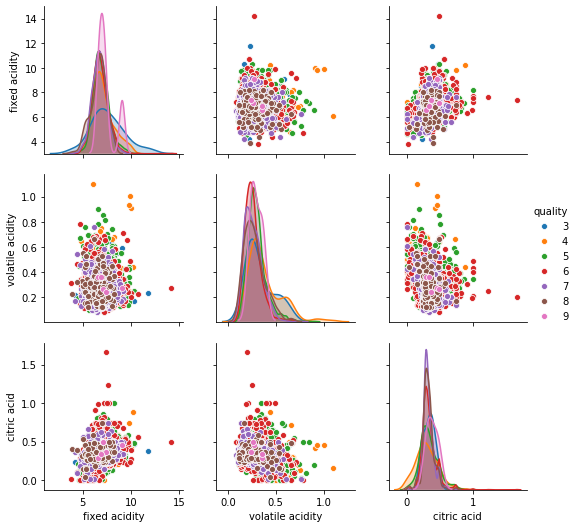

In [67]:
import seaborn as sns
g = sns.pairplot(data, vars=["fixed acidity", "volatile acidity","citric acid"], hue="quality")
plt.show(g)

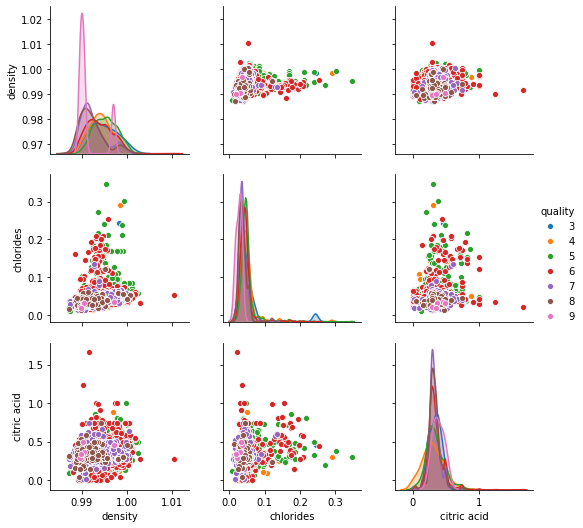

In [70]:
g = sns.pairplot(data, vars=["density", "chlorides","citric acid"], hue="quality")
plt.show(g)

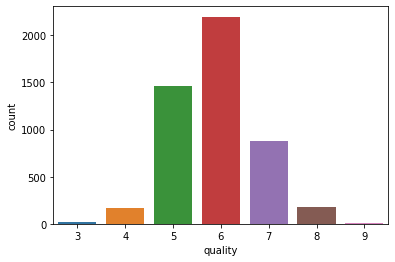

In [68]:
j = sns.countplot(x="quality", data=data)
plt.show(j)

No se tiene ningún atributo con valores en texto a los que haya que asignar un valor numérico para poder ser procesado, por lo que inicialmente ya podemos continuar con la detección y eliminación de posibles *outliers*


**EDIT**: Se ha observado volviendo a revisar los datos que tenemos una distribución mala. No sólo no tenemos vinos de todas las calidades, si no que además hay valores sobrerepresentados. No vamos a poder esperar milagros.

### Outliers 

En estadística, los *outliers* son puntos que claramente no pertenecen a cierta población. Es una observación fuera de lo normal que claramente queda lejos del resto de los valores. Un outlier es una observación que claramente diverge del resto de datos estructurados. Así, puede verse que en un conjunto [20,24,22,19,29,18,**4300**,30,18] hay un *outlier*. Para detectar un outlier, una primera aproximación sencilla consistirá en explorar los valores medios y máximos de cada uno de los atributos para ver si encontramos algo fuera de lo normal. <img src="outliers.jpg" style="width: 250px;"/>

In [31]:
for column in data.columns:
    print(str(column))
    print(data[column].mean())
    print(max(data[column]))

fixed acidity
6.854787668436075
14.2
volatile acidity
0.27824111882401087
1.1
citric acid
0.33419150673743736
1.66
residual sugar
6.391414863209486
65.8
chlorides
0.0457723560636995
0.34600000000000003
free sulfur dioxide
35.30808493262556
289.0
total sulfur dioxide
138.36065741118824
440.0
density
0.9940273764801896
1.03898
pH
3.1882666394446693
3.82
sulphates
0.4898468762760325
1.08
alcohol
10.514267047774638
14.2
quality
5.87790935075541
9


Se detecta que de los niveles de azúcar residual, hay uno con un valor de 65.8, procedemos a eliminar esa línea, ante la posibilidad de que pueda ser un error de medición (el siguiente valor más alto que se ha detectado es de 31.60). 

In [32]:
# mostramos de mayor a menor los valores de azúcar residual
data.sort_values(['residual sugar'], ascending=[False]).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2781,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6
1663,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1653,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
3619,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
3623,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6


In [33]:
#eliminamos el valor máximo detectado
max_index=data.index[data['residual sugar']==max(data['residual sugar'])].tolist()
data=data.drop(max_index)
# comprobamos que hemos quitado el valor máximo
data.sort_values(['residual sugar'], ascending=[False]).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1653,7.9,0.33,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,7.9,0.33,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
3623,6.8,0.45,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
3619,6.8,0.45,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
1608,6.9,0.27,0.49,23.50,0.057,59.0,235.0,1.00240,2.98,0.47,8.6,5


También tenemos un caso en que el **dióxido de azufre libre es demasiado elevado, 289,** pero parece que hay una relación inversa de ello con la calidad del vino, por lo que **vamos a dejarlo provisionalmente** para entrenar los datos.

In [34]:
data.sort_values(['free sulfur dioxide'], ascending=[False]).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4745,6.1,0.260,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3
1931,7.1,0.490,0.22,2.0,0.047,146.5,307.5,0.99240,3.24,0.37,11.0,3
3050,6.2,0.255,0.24,1.7,0.039,138.5,272.0,0.99452,3.53,0.53,9.6,4
325,7.5,0.270,0.31,5.8,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5
2334,7.5,0.230,0.35,17.8,0.058,128.0,212.0,1.00241,3.44,0.43,8.9,5


In [35]:
data.sort_values(['quality'], ascending=[False]).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
774,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
827,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
876,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
1605,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9
820,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9


Aunque no es el único factor, parece que, efectivamente, un dióxido de azufre libre y total excesivamente elevados, empeoran la calidad del vino.

In [36]:
data.sort_values(['total sulfur dioxide'], ascending=[False]).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4745,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3
1417,8.6,0.55,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3
2127,9.1,0.33,0.38,1.70,0.062,50.5,344.0,0.99580,3.10,0.70,9.5,5
325,7.5,0.27,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5
1931,7.1,0.49,0.22,2.00,0.047,146.5,307.5,0.99240,3.24,0.37,11.0,3


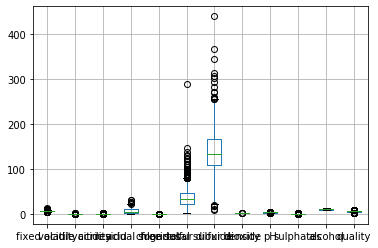

In [117]:
bc_dataframe = pd.DataFrame(data)
bc_dataframe.boxplot()

Tras un primer análisis de los datos, vamos a mezclar las líneas de forma aleatoria. Como nuestro objetivo es medir la calidad de los vinos, además seleccionaremos como nuestra y (target) la columna quality, y como X el resto de columnas. Seguidamente, procecemos a separar en conjunto de test / entrenamiento. 

In [37]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

data = data.sample(frac=1).reset_index(drop=True)
y = data['quality']
X = data.loc[:, data.columns != 'quality']
X = X.loc[:, X.columns != 'density'] # no es un dato demasiado significativo, y de variación leve, lo omitimos para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Vamos a realizar unas cuantas representaciones gráficas de los conjuntos obtenidos

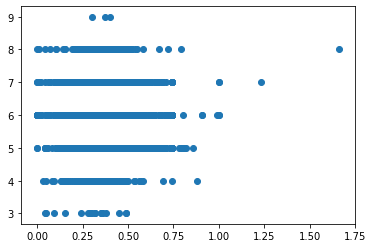

In [43]:
plt.scatter(X_train['citric acid'],y_train)
plt.show()

La distribución de los datos para cada parámetro parece demasiado contradictoria (se tienen calidades muy diferentes para un mismo valor numérico), por lo que a priori parece difícil poder encontrar alguna forma efectiva para clasificar los vinos. 

In [63]:
from sklearn.neural_network import MLPClassifier

mlp_wines = MLPClassifier(solver='lbfgs',random_state=0, activation='relu')
mlp_wines.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Rendimiento en el conjunto de entrenamiento:  0.4457492979320909
Rendimiento en el conjunto de prueba:  0.463265306122449
Rendimiento en el conjunto total:  0.4488462323871758


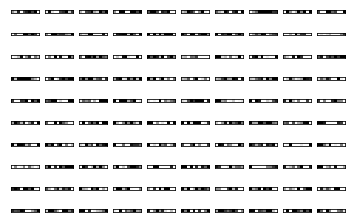

In [85]:
print("Rendimiento en el conjunto de entrenamiento: ",mlp_wines.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",mlp_wines.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",mlp_wines.score(X,y))

#observamos pesos MLP con MNIST
fig, axes = plt.subplots(10, 10)

vmin, vmax = mlp_wines.coefs_[0].min(), mlp_wines.coefs_[0].max()
for coef, ax in zip(mlp_wines.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(1, 10), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.savefig('activations.png')

In [132]:
 def probando_wines(f_act,capas):
    mlp_wines = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=capas, activation=f_act)
    mlp_wines.fit(X_train, y_train)
    print("Rendimiento en el conjunto de entrenamiento: ",mlp_wines.score(X_train,y_train))
    print("Rendimiento en el conjunto de prueba: ",mlp_wines.score(X_test,y_test))
    print("Rendimiento en el conjunto total: ",mlp_wines.score(X,y))
    return mlp_wines


In [133]:
probando_wines('relu',(5,100,30))

Rendimiento en el conjunto de entrenamiento:  0.44549400051059485
Rendimiento en el conjunto de prueba:  0.463265306122449
Rendimiento en el conjunto total:  0.4488462323871758


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 100, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [134]:
probando_wines('logistic',(20,20,20,20,20,20,20,))

Rendimiento en el conjunto de entrenamiento:  0.4452387030890988
Rendimiento en el conjunto de prueba:  0.46224489795918366
Rendimiento en el conjunto total:  0.4486420257300388


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20, 20, 20, 20, 20),
              learning_rate='constant', learning_rate_init=0.001, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [135]:
probando_wines('tanh',(20,20,20,20,20,20,20,))

Rendimiento en el conjunto de entrenamiento:  0.44600459535358694
Rendimiento en el conjunto de prueba:  0.46224489795918366
Rendimiento en el conjunto total:  0.44823361241576476


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20, 20, 20, 20, 20),
              learning_rate='constant', learning_rate_init=0.001, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [136]:
probando_wines('relu',(7,80,22))

Rendimiento en el conjunto de entrenamiento:  0.4447281082461067
Rendimiento en el conjunto de prueba:  0.46224489795918366
Rendimiento en el conjunto total:  0.4486420257300388


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(7, 80, 22), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Rendimiento en el conjunto de entrenamiento:  0.44600459535358694
Rendimiento en el conjunto de prueba:  0.46224489795918366
Rendimiento en el conjunto total:  0.44823361241576476


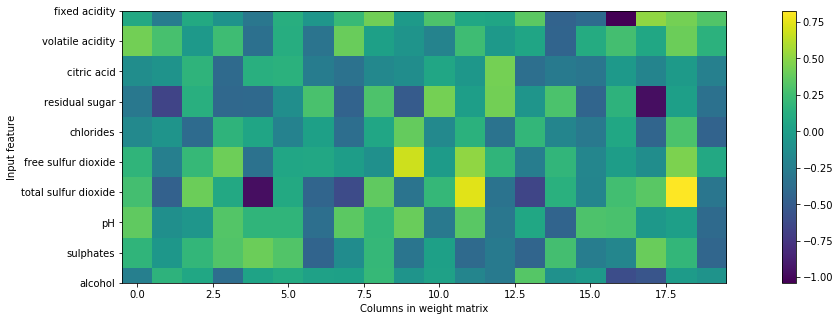

In [141]:
 # observamos primera capa oculta para cada una de las características, para ver el grado de importancia de cada una.
plt.figure(figsize=(20, 5))
plt.imshow(probando_wines('tanh',(20,20,20,20,20,20,20,)).coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(10), X_train.columns.tolist())
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

Parece que no se puede conseguir mucha más accuracy, y los resultados son bastante similares a pesar de que hemos probado otras funciones de activación. El principal motivo: los datos, por una parte, al no tener unos datos distribuidos uniformemente, y con ruido. Por otro lado, es posible que la puntuación de calidad dada a cada uno de los vinos sea una calificación fuertemente subjetiva. 